## Lab 1: A little statistics
---

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

### 1b

In [85]:
d = stats.norm.cdf(a)
d

array([0.53982784, 0.69146246, 0.84134475, 0.9331928 , 0.99379033,
       0.99996833])

In [73]:
d.cdf(1)

0.8413447460685429

In [88]:
a=[0.1,0.5,1,1.5,2.5,4]
for i in range(len(a)):
    print(a[i],stats.norm.cdf(a[i],loc=0,scale=1))

0.1 0.539827837277029
0.5 0.6914624612740131
1 0.8413447460685429
1.5 0.9331927987311419
2.5 0.9937903346742238
4 0.9999683287581669


In [7]:
stats.norm.rvs(loc=5,scale=0.01)

4.993695832358208

In [10]:
stats.norm.rvs(loc=4,scale=0.01)

4.000935786834681

In [16]:
d = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)

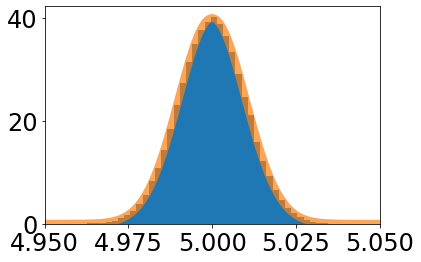

In [17]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([4.95,5.05])
x = np.linspace(4.95,5.05,1000)
ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

In [18]:
stats.norm.cdf(d,loc=5,scale=0.01)

array([0.23128776, 0.45080191, 0.32386262, ..., 0.93668502, 0.97358543,
       0.1784874 ])

In [20]:
stats.norm.cdf(3)

0.9986501019683699

### 1C

In [29]:
stats.norm.ppf(0.539827837277029)

0.10000000000000002

### 1D

In [32]:
stats.norm.ppf(0.49999999999)

-2.506628482030354e-11

In [35]:
np.random.seed(seed=42)
d = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)
#draws=4000
#chi2=np.empty(100000)
samples=5
i=0
#while i<100000:
#    np.random.chisquare()

In [36]:
np.random.random_sample()

0.5589480049731603

In [41]:
np.random.chisquare(1)

1.1942846373851392

### 2A chi^2 distribution
${\displaystyle f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}.\end{cases}}}$

In [201]:
gam=scipy.special.gamma
def tc2(x,k):
    try:
        num=x**((k/2)-1)*np.exp(-x/2)
        f= num/(gam(k/2)*2**(k/2))
        return f
    except:
        return 0
def cd1(x,k):
    return scipy.special.gammainc(k/2,x/2)/gam(k/2)

In [204]:
tc2(-2,4)

-1.3591409142295225

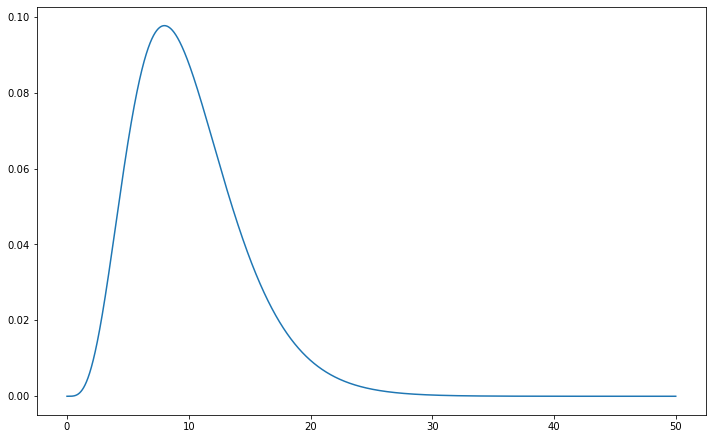

In [176]:
fig, ax = plt.subplots(figsize=(12, 7.5))
v = np.linspace(0,50, 100000)
k=10
ax.plot(v,tc2(v,k))

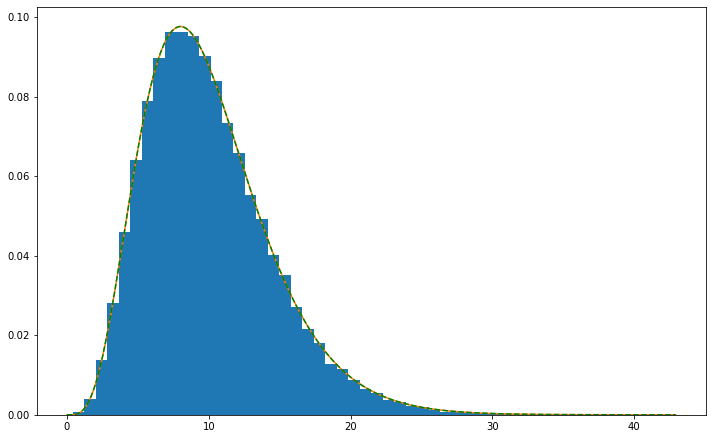

In [212]:
l=0.0
s=1.0
df=10
#d = stats.norm.rvs(loc = 5, scale = 0.01, size = 100000)
c21=stats.chi2.rvs(df,loc = l, scale = s, size = 100000,random_state=420)
fig, ax = plt.subplots(figsize=(12, 7.5))
#c2=np.random.chisquare(d)
ax.hist(c21, bins=50, density=True);
v = np.linspace(0,ax.get_xlim()[1], 100000)
ax.plot(v,stats.chi2.pdf(v,df,loc=l,scale=s))
#v = np.linspace(0,50, 100000)
k=10
ax.plot(v,tc2(v,df),color='g',ls='--');

### make more *plots*

---
## Part 3
Find the prob of your measurement is a background produced signal
* No signal data
* This is **only** *signal free* data
* I have to determine a hypothetical measurement
* I have to determine what the signal "*goodness*" conditions are (is it a better signal as my values get smaller/larger or near a point) 
* Then I can create an integral from the semi-log plot

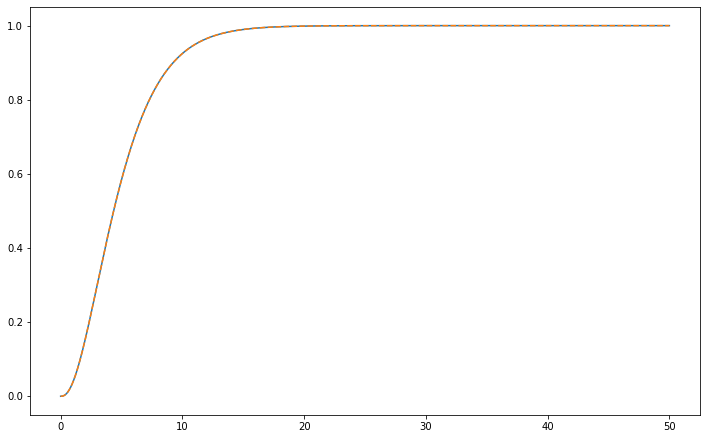

In [199]:
df=5
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.plot(v,stats.chi2.cdf(v,df,loc=0,scale=1))
ax.plot(v,cd1(v,df)/cd1(v,df).max(),ls='--')
#ax.plot(v,scipy.integrate.quad(tc2(v,df),-np.inf,50))

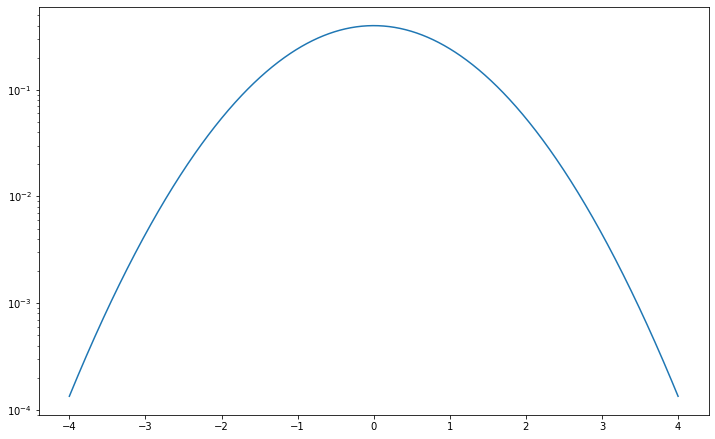

In [218]:
fig, ax = plt.subplots(figsize=(12, 7.5))
x=np.linspace(-4,4,1000)
plt.yscale('log')
ax.plot(x,stats.norm.pdf(x,loc=0,scale=1))

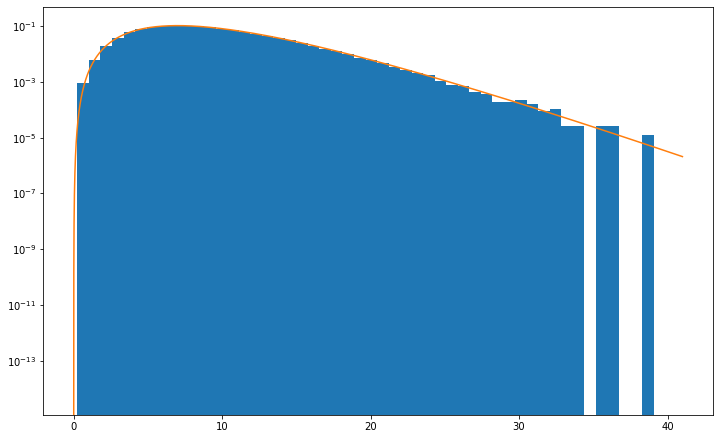

In [211]:
l=0.0
s=1.0
df=9
#d = stats.norm.rvs(loc = 5, scale = 0.01, size = 100000)
c21=stats.chi2.rvs(df,loc = l, scale = s, size = 100000,random_state=420)
fig, ax = plt.subplots(figsize=(12, 7.5))
#c2=np.random.chisquare(d)
ax.hist(c21, bins=50, density=True);
v = np.linspace(0,ax.get_xlim()[1], 100000)
plt.yscale('log')
#ax.plot(v,stats.chi2.pdf(v,df,loc=l,scale=s));
ax.plot(v,tc2(v,df));

In [189]:
cd1(v,df)/cd1(v,df).max()

array([0.00000000e+00, 8.13673458e-21, 2.60321267e-19, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [193]:
cd1(v,df).max()

0.7522527770212051